In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [3]:
sale_clean = data.drop(['Row ID','Customer ID','Country','Product ID','Ship Date'],axis=1)
sale_clean.head()

,Order ID,Order Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data["Order Date"] = pd.DatetimeIndex(data["Order Date"])
data["Ship Date"] = pd.DatetimeIndex(data["Ship Date"])

In [5]:
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Day'] = pd.DatetimeIndex(data['Order Date']).day
data['Day of Week'] = data['Order Date'].dt.strftime('%A')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>]], dtype=object)

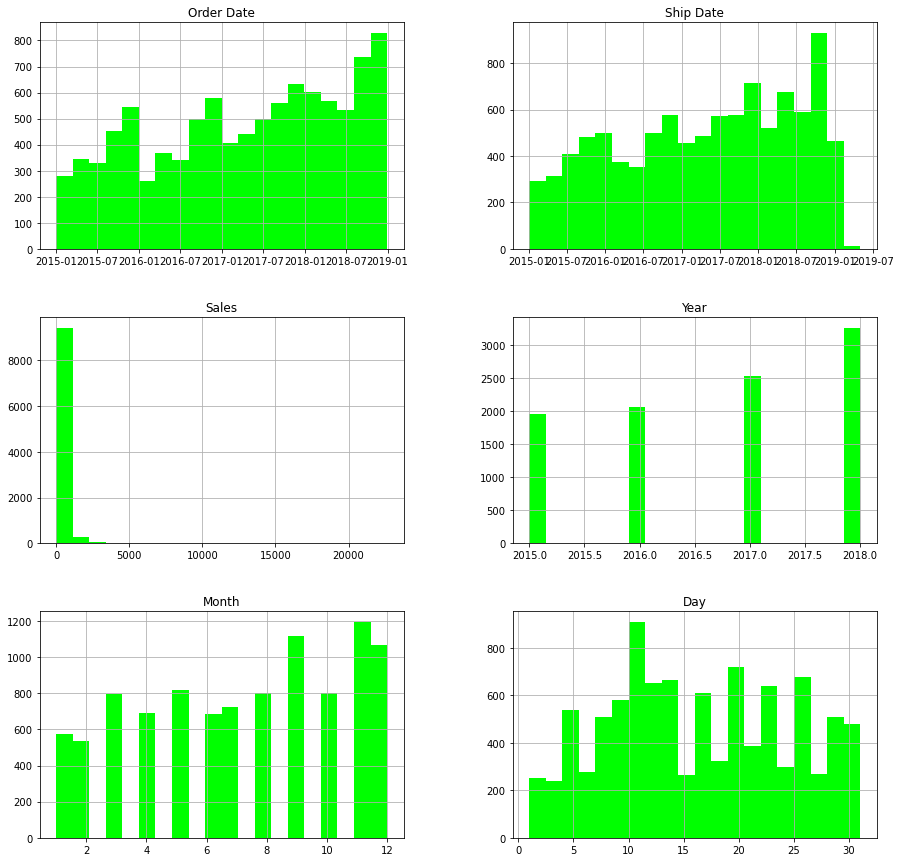

In [6]:
data[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (15,15), color = 'lime')

In [7]:
best_cities = data.pivot_table(values = "Sales" , index = "City" , aggfunc = "sum")
best_cities = best_cities.sort_values(by=['Sales'], ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round(2)
best_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


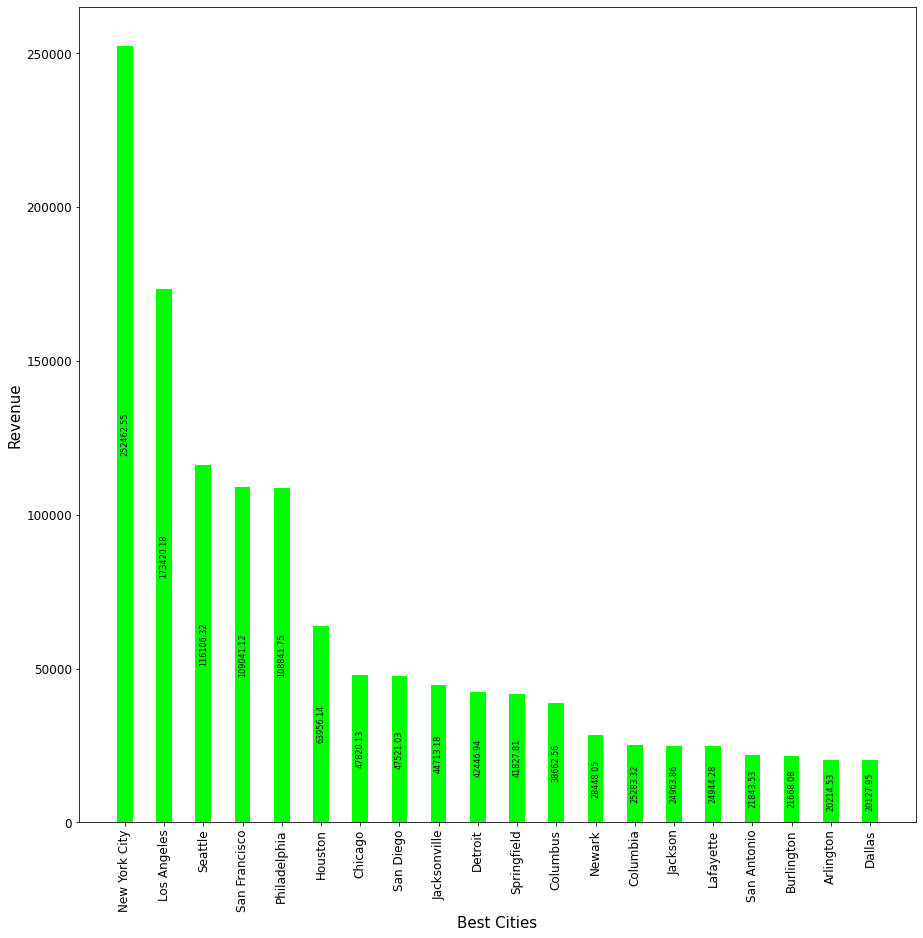

In [8]:
f = plt.figure(figsize = (15, 15))
plt.bar(best_cities['City'],best_cities['Sales'] , color ='lime',width = 0.4)
plt.xlabel("Best Cities",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_cities['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='black' , fontsize=8)
plt.show()

In [9]:
best_category = data.pivot_table(values = "Sales" , index = "Category" , aggfunc = "sum")
best_category = best_category.sort_values(by=['Sales'], ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales'] = best_category['Sales'].round(2)
best_category

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


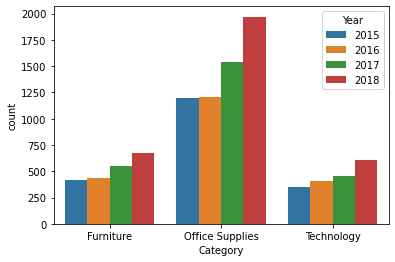

In [10]:
sns.countplot(data=data,x="Category", hue='Year')
plt.xticks(rotation=0)
plt.show()

<Figure size 432x288 with 0 Axes>

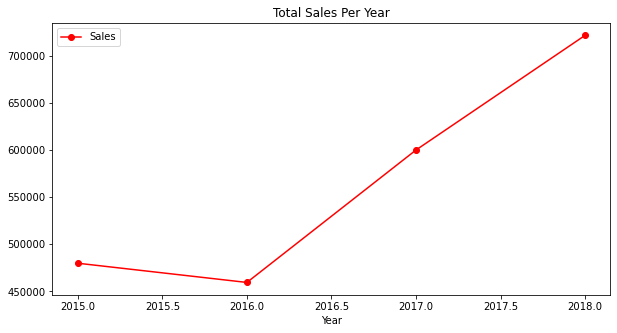

<Figure size 432x288 with 0 Axes>

In [11]:
axis = data.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')

plt.figure()

<Figure size 432x288 with 0 Axes>

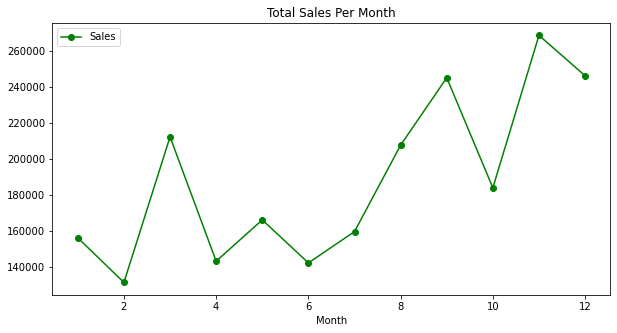

<Figure size 432x288 with 0 Axes>

In [12]:
axis = data.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'g')
axis.set_title('Total Sales Per Month')

plt.figure()

<Figure size 432x288 with 0 Axes>

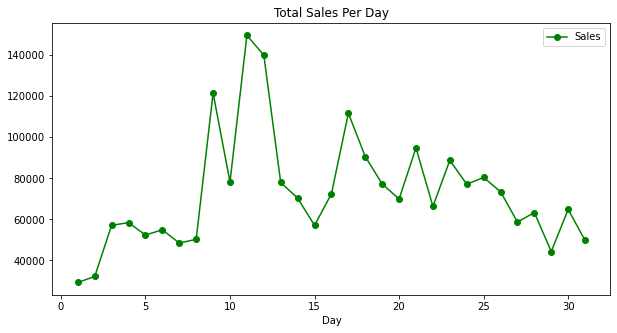

<Figure size 432x288 with 0 Axes>

In [13]:
ax = data.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'green')
plt.title('Total Sales Per Day')

plt.figure()

<AxesSubplot:>

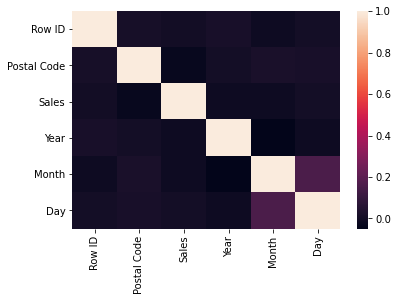

In [14]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [15]:
best_states = data.pivot_table(values = "Sales" , index = "State" , aggfunc = "sum")
best_states = best_states.sort_values(by=['Sales'], ascending=False).head(20)
best_states.reset_index(inplace=True)
best_states['Sales'] = best_states['Sales'].round(2)
best_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


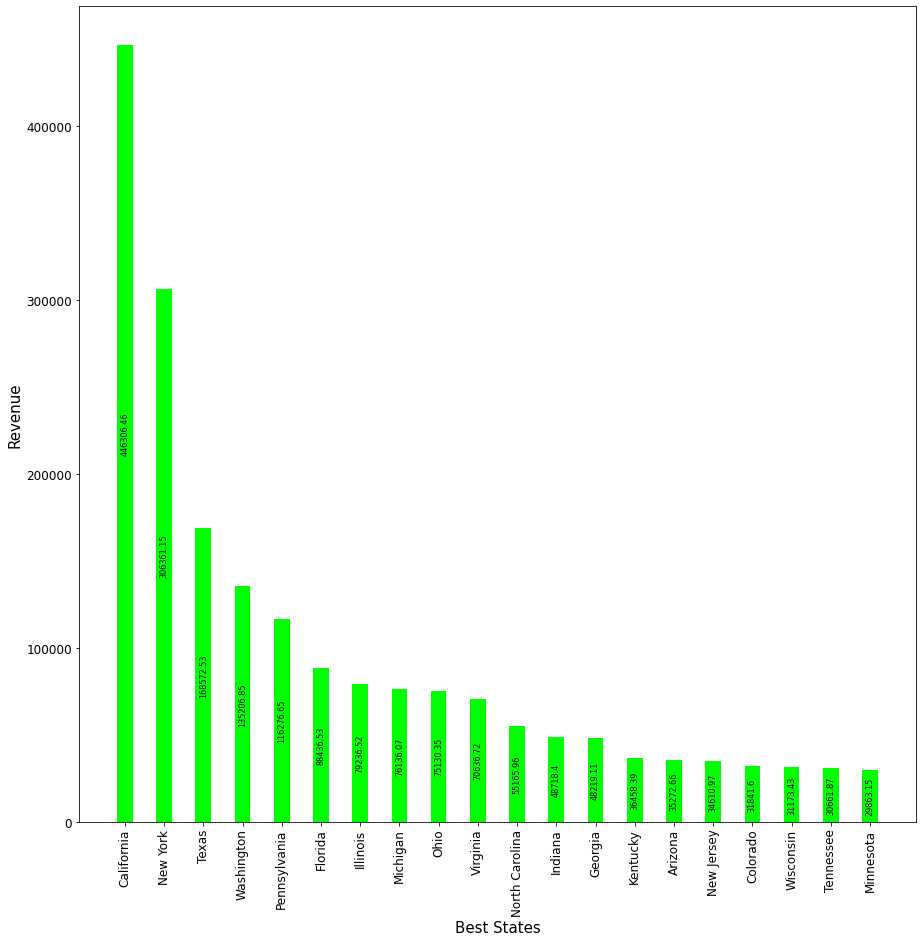

In [16]:
f = plt.figure(figsize = (15, 15))
plt.bar(best_states['State'], best_states['Sales'], color ='lime', width = 0.4)
plt.xlabel("Best States",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_states['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='black' , fontsize=8)
plt.show()

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your dataset or replace this with your data
# Assuming the "Order Date" is in a standard date format (e.g., YYYY-MM-DD)
data = pd.read_csv("train.csv")

# Extract the target variable (Sales Price) and features (Sales Price and Order Date)
X = data[["Sales", "Order Date"]].copy()

# Preprocess the "Order Date" feature to extract useful information
X["Order Date"] = pd.to_datetime(X["Order Date"])  # Convert to datetime object
X["Year"] = X["Order Date"].dt.year
X["Month"] = X["Order Date"].dt.month
X["Day"] = X["Order Date"].dt.day
X["DayOfWeek"] = X["Order Date"].dt.dayofweek

# Drop the original "Order Date" column as it's no longer needed
X.drop(columns=["Order Date"], inplace=True)

# Extract the target variable (Sales Price) and features
y = X["Sales"].values.reshape(-1, 1)
X.drop(columns=["Sales"], inplace=True)
X = X.values

# Scale the features to the range [0, 1] for better training performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model with at least three hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),  # First hidden layer
    tf.keras.layers.Dense(64, activation="relu"),   # Second hidden layer
    tf.keras.layers.Dense(32, activation="relu"),   # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
epochs = 100
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Set:", loss)

Epoch 1/100
245/245 [==============================] - 1s 848us/step - loss: 339166.1562
Epoch 2/100
245/245 [==============================] - 0s 874us/step - loss: 325125.2812
Epoch 3/100
245/245 [==============================] - 0s 769us/step - loss: 324962.0938
Epoch 4/100
245/245 [==============================] - 0s 901us/step - loss: 324817.0625
Epoch 5/100
245/245 [==============================] - 0s 723us/step - loss: 324226.5938
Epoch 6/100
245/245 [==============================] - 0s 784us/step - loss: 323937.5938
Epoch 7/100
245/245 [==============================] - 0s 765us/step - loss: 323872.8125
Epoch 8/100
245/245 [==============================] - 0s 766us/step - loss: 323921.7500
Epoch 9/100
245/245 [==============================] - 0s 783us/step - loss: 323701.5938
Epoch 10/100
245/245 [==============================] - 0s 772us/step - loss: 323554.7188
Epoch 11/100
245/245 [==============================] - 0s 752us/step - loss: 323591.6875
Epoch 12/100
245/24

In [18]:
# Generate future date instances for the next 20 days
last_date = data["Order Date"].max()
future_dates = pd.date_range(last_date, periods=20, freq="D")

# Create new data instances with Sales Price = 0 for prediction (we don't know the actual Sales Price for future dates)
new_data = np.zeros((len(future_dates), 4)) # Use 4 features for the new_data
new_data[:, 0] = future_dates.year
new_data[:, 1] = future_dates.month
new_data[:, 2] = future_dates.day
new_data[:, 3] = future_dates.dayofweek

# Scale the new data using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Make predictions for the next 20 days
predictions = model.predict(new_data_scaled)

# Create a DataFrame to store the predictions with the corresponding dates
predictions_df = pd.DataFrame({"Order Date": future_dates, "Predicted Sales Price": predictions[:, 0]})

# Print the predictions for the next 20 days
print(predictions_df)

1/1 [==============================] - 0s 58ms/step
   Order Date  Predicted Sales Price
0  2017-12-31             226.425629
1  2018-01-01             270.226593
2  2018-01-02             268.649323
3  2018-01-03             267.459686
4  2018-01-04             266.382355
5  2018-01-05             265.281708
6  2018-01-06             264.181030
7  2018-01-07             263.672241
8  2018-01-08             260.811981
9  2018-01-09             258.580383
10 2018-01-10             256.427307
11 2018-01-11             254.616470
12 2018-01-12             253.502121
13 2018-01-13             252.412445
14 2018-01-14             251.349411
15 2018-01-15             251.516724
16 2018-01-16             249.285095
17 2018-01-17             247.053497
18 2018-01-18             245.105530
19 2018-01-19             243.289322
